In [1]:
import pandas as pd
import pandas_datareader.data as web
import yfinance as yf
import datetime

yf.pdr_override()
start = datetime.datetime(2012, 1 , 1)
end = datetime.datetime.today()

data_dict = {}
stocks = ["UUP", "^TNX"]
for key in stocks:
    data_dict[key] = web.get_data_yahoo(key, start, end)[["Close"]].rename(columns = {"Close":key})

data_dict

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


{'UUP':                   UUP
 Date                 
 2012-01-03  22.280001
 2012-01-04  22.400000
 2012-01-05  22.639999
 2012-01-06  22.719999
 2012-01-09  22.639999
 ...               ...
 2023-10-31  30.030001
 2023-11-01  30.040001
 2023-11-02  29.889999
 2023-11-03  29.610001
 2023-11-06  29.615101
 
 [2981 rows x 1 columns],
 '^TNX':              ^TNX
 Date             
 2012-01-03  1.960
 2012-01-04  1.995
 2012-01-05  1.993
 2012-01-06  1.961
 2012-01-09  1.960
 ...           ...
 2023-10-31  4.875
 2023-11-01  4.789
 2023-11-02  4.669
 2023-11-03  4.558
 2023-11-06  4.649
 
 [2979 rows x 1 columns]}

In [2]:
close_data = pd.concat([val[key] for key, val in data_dict.items()], 
                       keys = data_dict.keys(), 
                       axis = 1)
close_data.rename(columns = {"^TNX":"UST10Y"}, inplace = True)

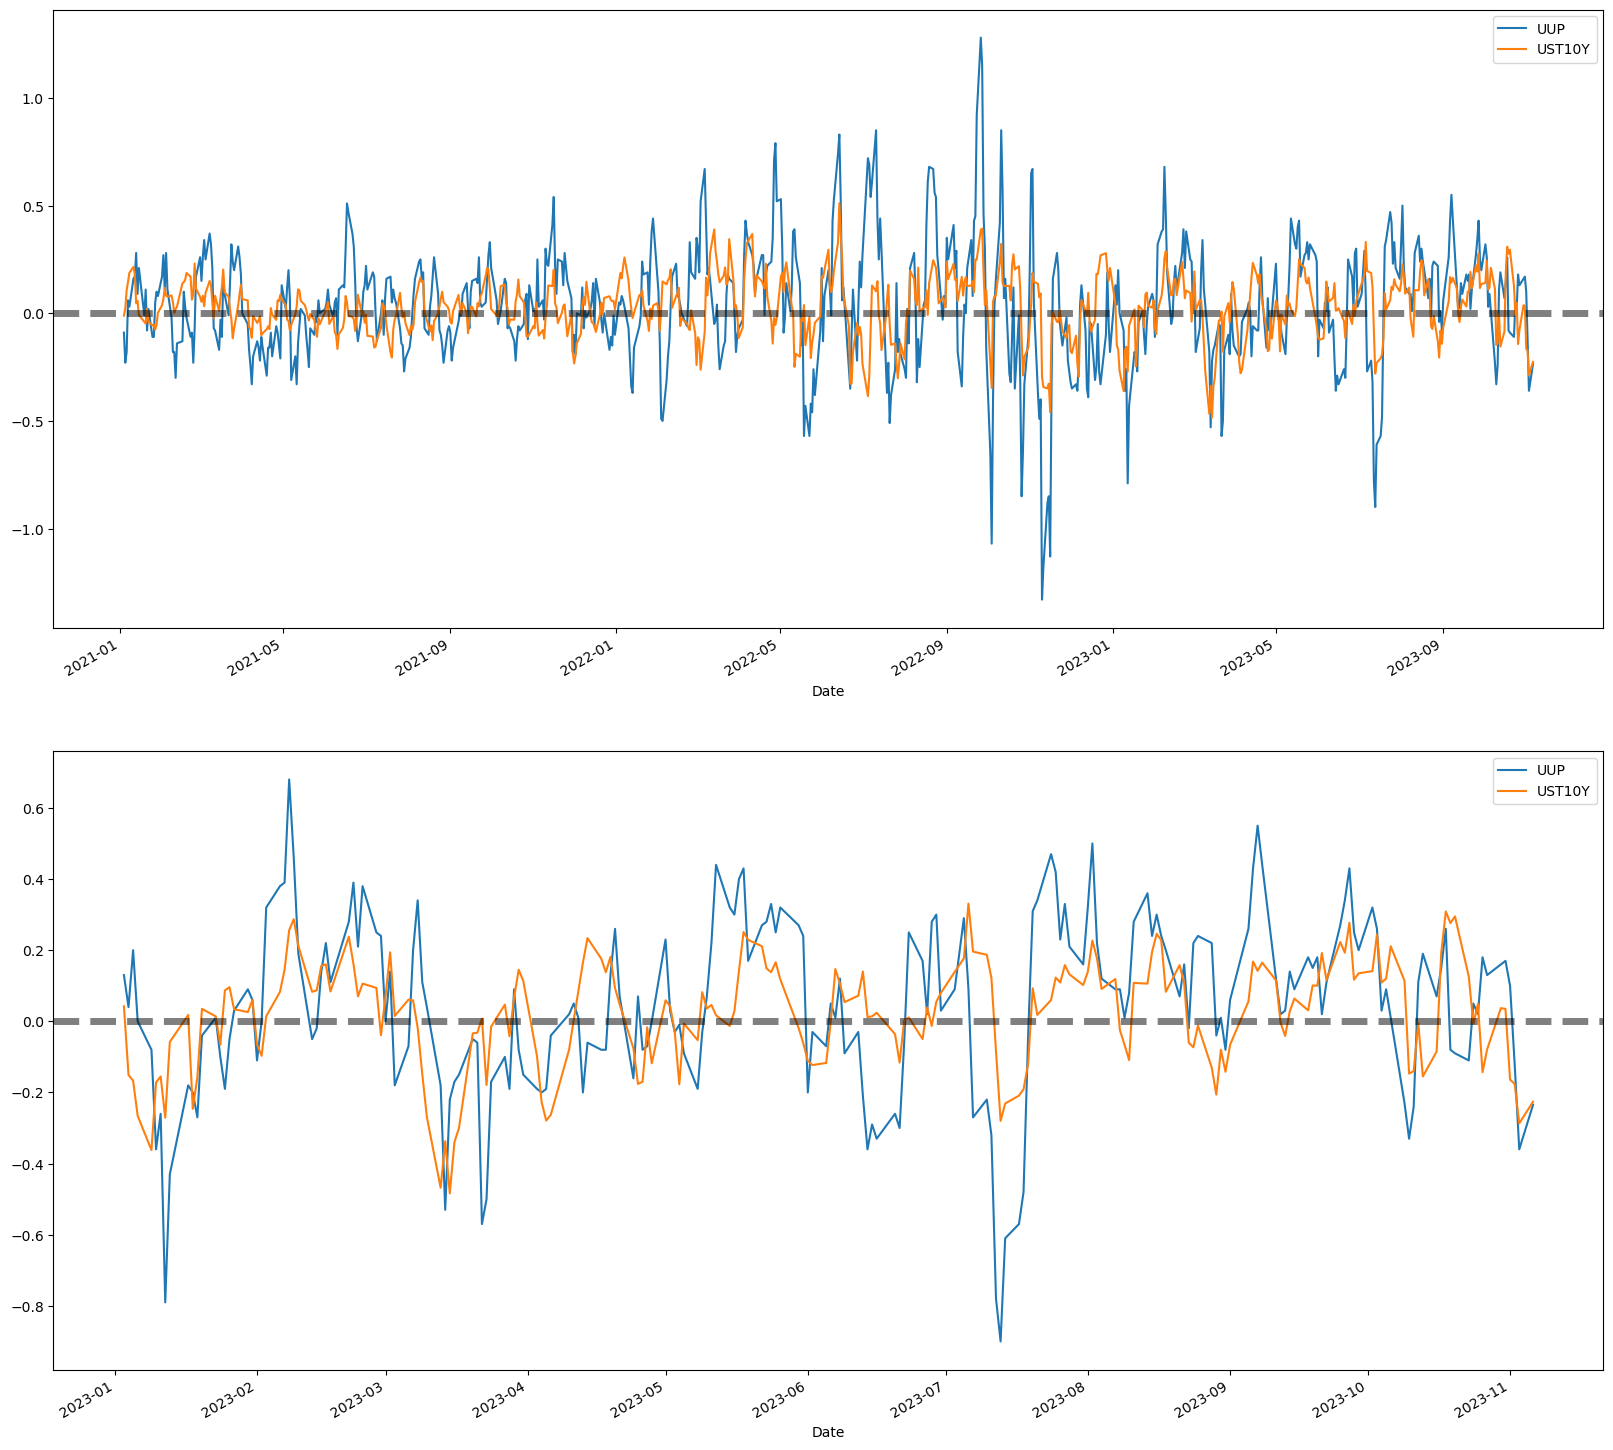

In [3]:
import matplotlib.pyplot as plt
plot_data = close_data.diff(5)
fig, axs = plt.subplots(2,1, figsize = (20,20))
plot_data.loc["2021":].plot.line(ax = axs[0])
plot_data.loc["2023"].plot.line(ax = axs[1])
for ax in axs:
    ax.axhline(0, ls = "--", linewidth = 5, color = "k", alpha = .5)

C:\Users\JLCat\AppData\Local\Temp\ipykernel_36368\1563236721.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(round(i*100,1)) + "%" for i in ax.get_yticks()], color = "C0")
C:\Users\JLCat\AppData\Local\Temp\ipykernel_36368\1563236721.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels([str(round(i*100,1)) + "%" for i in ax2.get_yticks()], color = "C1")


Text(0.5, 1.0, 'Week-over-Week Change')

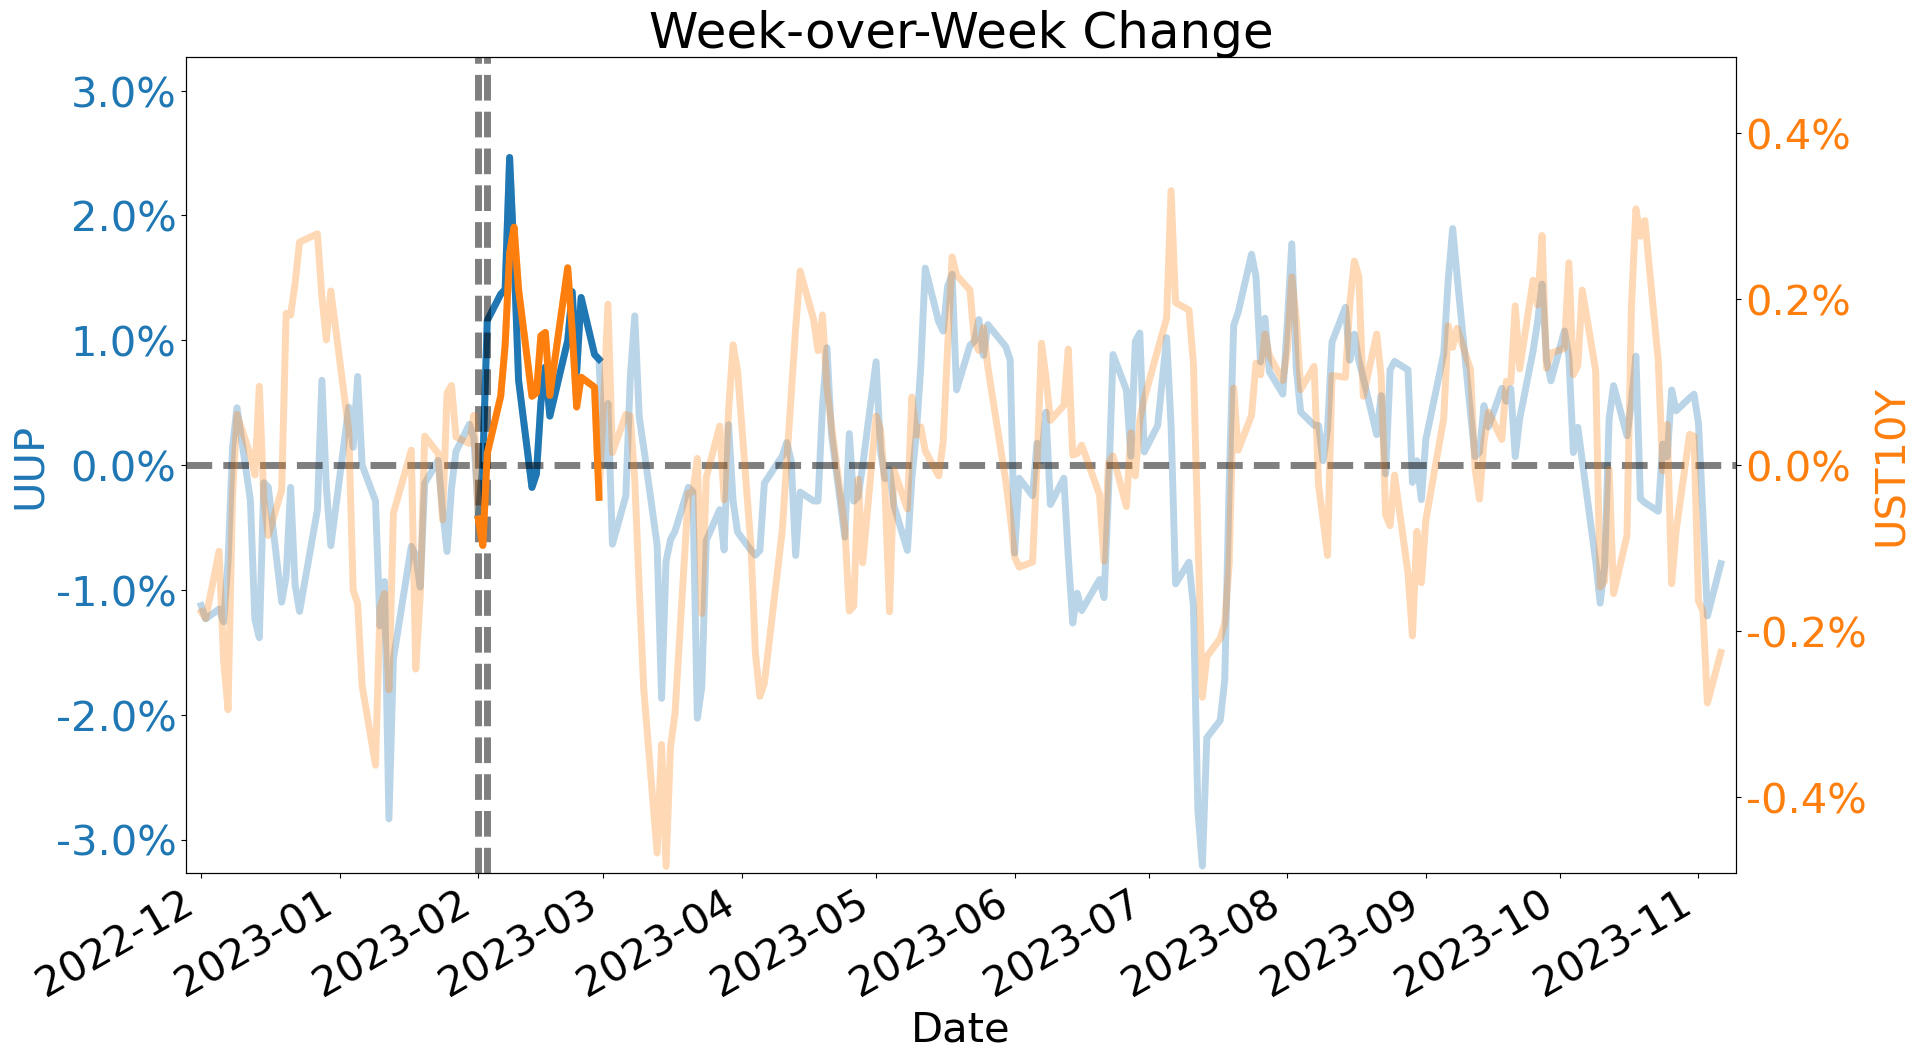

In [4]:
import numpy as np
import mpl_axes_aligner
plt.rcParams["font.size"] = 30
plt.rcParams['axes.xmargin'] = 0.01  
plt.rcParams['axes.ymargin'] = 0.01 
import matplotlib.pyplot as plt
plot_data = close_data.copy()

plot_data["UUP"] = np.log(close_data["UUP"])
plot_data["UST10Y"] =close_data["UST10Y"].div(100)

plot_data = plot_data.diff(5).loc["2022-12":"2023"]
fig, ax = plt.subplots(figsize = (20,12))
ax2 = ax.twinx()
plot_data["UUP"].plot.line(linewidth = 5, alpha = .3, ax = ax)
plot_data["UST10Y"].plot.line(linewidth = 5,alpha = .3,color = "C1", ax = ax2)

plot_data["UUP"].loc["2023-02"].plot.line(linewidth = 5, color = "C0", ax = ax)
plot_data["UST10Y"].loc["2023-02"].plot.line(linewidth = 5,color = "C1", ax = ax2)





mpl_axes_aligner.align.yaxes(ax, 0, ax2, 0, 0.5)
ax.set_yticklabels([str(round(i*100,1)) + "%" for i in ax.get_yticks()], color = "C0")
ax.set_ylabel("UUP", color = "C0")
ax2.set_yticklabels([str(round(i*100,1)) + "%" for i in ax2.get_yticks()], color = "C1")
ax2.set_ylabel("UST10Y", color = "C1")
ax.axhline(0, ls = "--", linewidth = 5, color = "k", alpha = .5)
ax.axvline("2023-02-01", ls = "--", linewidth = 5, color = "k", alpha = .5)
ax.axvline("2023-02-03", ls = "--", linewidth = 5, color = "k", alpha = .5)
ax.set_title("Week-over-Week Change")